In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("talk")

In [2]:
df = pd.read_csv("../Datasets/example_retail_sales.csv", index_col=["ds"])
df.head(5)

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


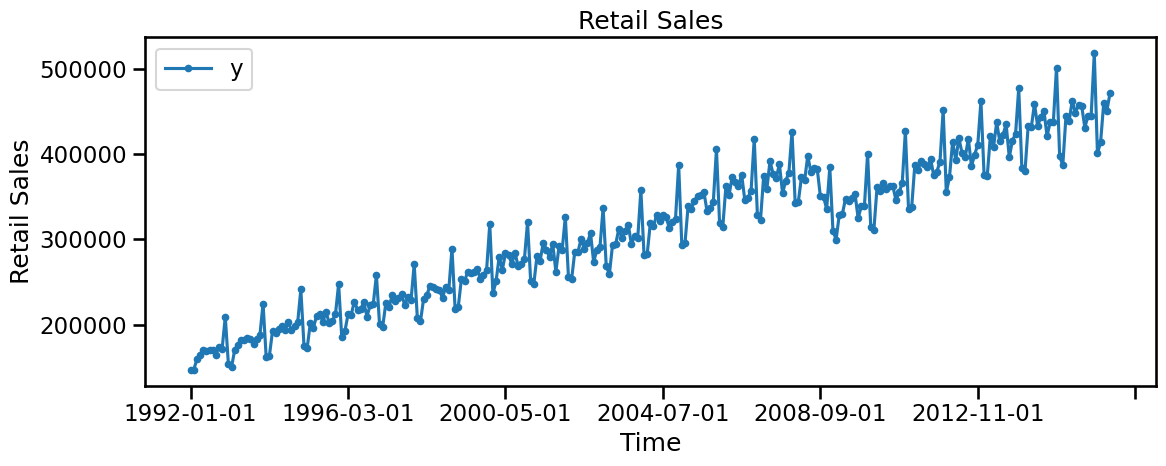

In [3]:
####################################################################
###################### Compute Moving Averages ###################### 
#####################################################################

fig, ax = plt.subplots(figsize=[12, 5])
df.plot(ax=ax, marker=".")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")
ax.set_title("Retail Sales")
plt.tight_layout()

In [4]:
window_size = 3  # AKA the order of the moving average
ma_3 = df.rolling(
    window=window_size,  # Size of the window
    center=True  # Compute average at center of window
    # This flag only works correctly for odd window sizes
).mean()

ma_3.rename(columns={"y": "3-MA"}, inplace=True)  # Rename the column

ma_3.head()

,3-MA
ds,
1992-01-01,NaN
1992-02-01,150930.333333
1992-03-01,156694.666667
1992-04-01,164357.666667
1992-05-01,167466.666667


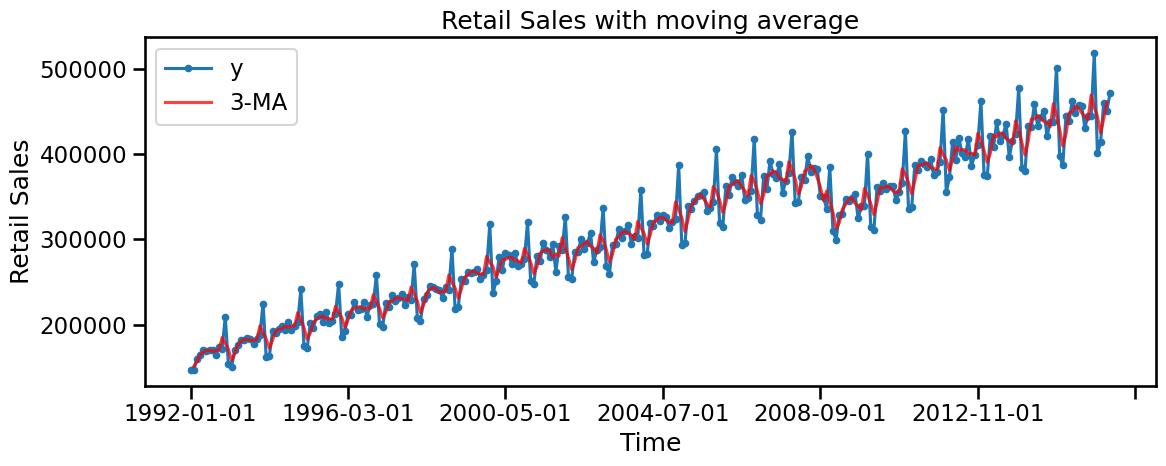

In [5]:
# Plot the result
fig, ax = plt.subplots(figsize=[12, 5])

df.plot(ax=ax, marker=".")
ma_3.plot(ax=ax, color="r", alpha=0.75)

ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")
ax.set_title("Retail Sales with moving average")
plt.tight_layout()

In [6]:
# Compute 2 X 12-MA
window_size = 12
ma_2x12 = (
    df.rolling(window=window_size)
    .mean()  # Apply the 12-MA without a centered window
    # The average is computed at the end of the window
    .rolling(window=2)
    .mean()  # Apply the 2-MA without a centred window
    # The average is computed at the end of the window
    .shift(-window_size // 2)  # Shift is required to align the 2x4-MA to what a
    # centered window would have produced
    # Integer division is used as shift() requires an int
)

ma_2x12.rename(columns={"y": "2x12-MA"}, inplace=True)  # Rename the column

ma_2x12.head(10)

,2x12-MA
ds,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,NaN
1992-07-01,168127.041667
1992-08-01,168537.583333
1992-09-01,169125.541667


# Classical Decomposition 

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv", parse_dates=["ds"], index_col=["ds"]
)

df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


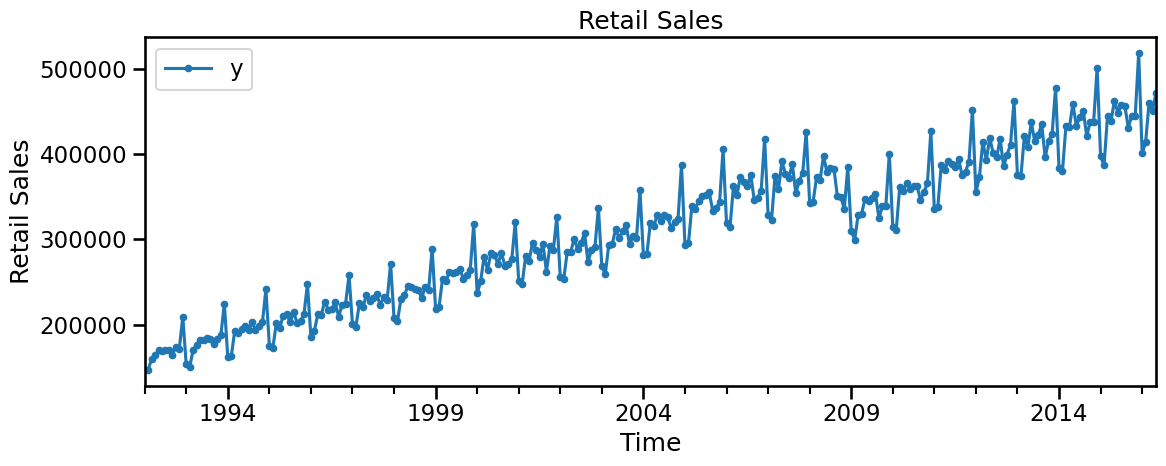

In [9]:
fig, ax = plt.subplots(figsize=[12, 5])

df.plot(ax=ax, marker=".")
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")
ax.set_title("Retail Sales")
plt.tight_layout()

In [10]:
####  (01) Compute the trend : The data has a monthly frequency and we observe yearly seasonality (i.e., a pattern which repeats every 12 periods). Therefore, a 2x12-MA is recommended for the trend.
window_size = 12
df["trend"] = (
    df.rolling(window=window_size)
    .mean()  # Apply the 12-MA without a centered window
    # The average is computed at the end of the window
    .rolling(window=2)
    .mean()  # Apply the 2-MA without a centred window
    # The average is computed at the end of the window
    .shift(-window_size // 2)  # Shift is required to align the 2x4-MA to what a
    # centered window would have produced
    # Integer division is used as shift() requires an int
)


#### (02) Detrend the data 
df["y_detrended"] = df["y"] - df["trend"]



###### (03) Average over de-trended data for each month
df["month"] = df.index.month
seasonality = df.groupby("month").mean()["y_detrended"]
seasonality.name = "seasonality"
seasonality

month
1    -31085.898551
2    -32941.297101
3      3032.637681
4     -2933.978261
5     13554.688406
6      4457.835145
7      4140.364583
8     10267.178819
9    -11945.057292
10    -3233.472222
11    -1135.296875
12    47751.626812
Name: seasonality, dtype: float64

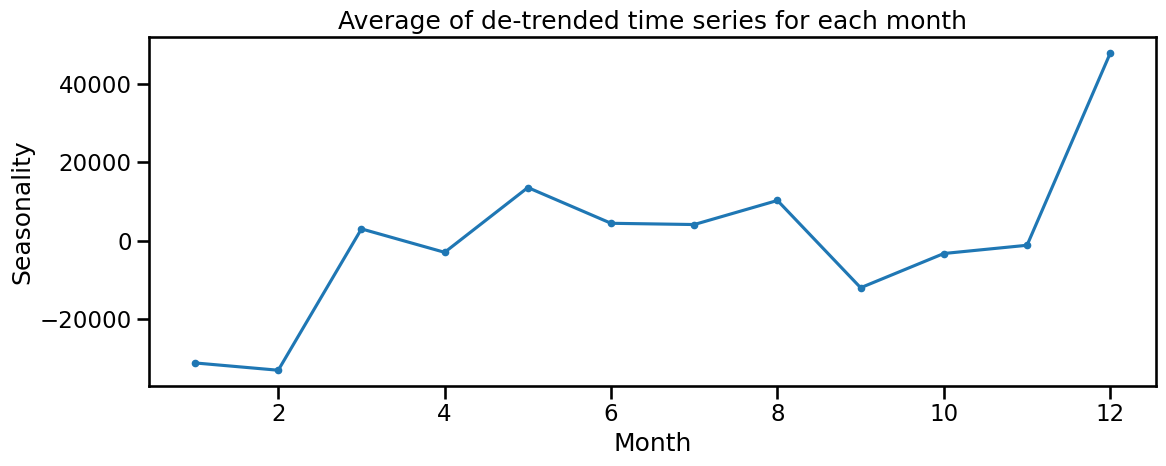

In [11]:
fig, ax = plt.subplots(figsize=[12, 5])
seasonality.plot(y="seasonality", ax=ax, marker=".")
ax.set_xlabel("Month")
ax.set_ylabel("Seasonality")
ax.set_title("Average of de-trended time series for each month")
plt.tight_layout()

In [12]:
##############  (04) Repeat seasonal pattern each year 
df = df.merge(right=seasonality, left_on="month", right_index=True)
df = df.sort_index()
df.head()

,y,trend,y_detrended,month,seasonality
ds,,,,,
1992-01-01,146376,NaN,NaN,1,-31085.898551
1992-02-01,147079,NaN,NaN,2,-32941.297101
1992-03-01,159336,NaN,NaN,3,3032.637681
1992-04-01,163669,NaN,NaN,4,-2933.978261
1992-05-01,170068,NaN,NaN,5,13554.688406


In [13]:
############ (05) Compute the  residual component
df["residual"] = df["y"] - df["trend"] - df["seasonality"]

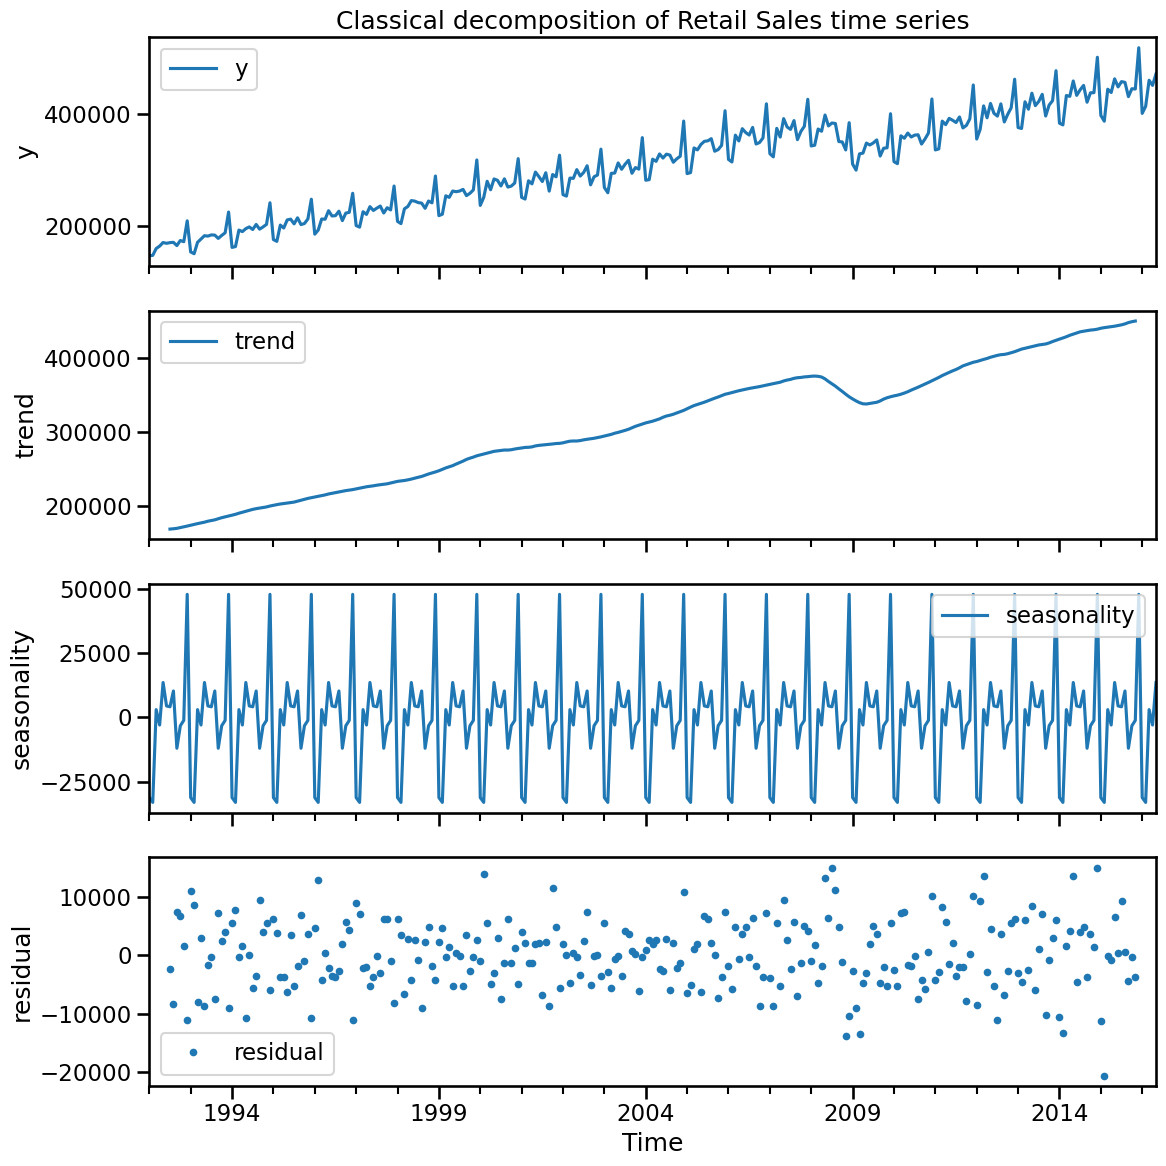

In [14]:
##################  Plot all the results ########################
fig, ax = plt.subplots(nrows=4, figsize=[12, 12], sharex=True)

df["y"].plot(ax=ax[0], legend="y")
ax[0].set_ylabel("y")

df["trend"].plot(ax=ax[1], legend="trend")
ax[1].set_ylabel("trend")

df["seasonality"].plot(ax=ax[2], legend="seasonality")
ax[2].set_ylabel("seasonality")

df["residual"].plot(ax=ax[3], marker=".", legend="residual", ls="None")
ax[3].set_ylabel("residual")

ax[0].set_title("Classical decomposition of Retail Sales time series")
ax[3].set_xlabel("Time")

plt.tight_layout()


# MSTL decomposition 

In [ ]:
##### There is a pdf in papers folder called MSTL 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import MSTL

sns.set_style("darkgrid")
sns.set_context("poster")

In [16]:
df = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["date_time", "demand"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)

In [17]:
df.head()

,demand
date_time,
2002-01-01 00:00:00,6919.366092
2002-01-01 01:00:00,7165.974188
2002-01-01 02:00:00,6406.542994
2002-01-01 03:00:00,5815.537828
2002-01-01 04:00:00,5497.732922


In [19]:
# Filter for first 149 days of 2012.
start_date = pd.to_datetime("2012-01-01")
end_date = start_date + pd.Timedelta("149D")
mask = (df.index >= start_date) & (df.index < end_date)
timeseries = df[mask].copy()
timeseries.head()

,demand
date_time,
2012-01-01 00:00:00,7926.529376
2012-01-01 01:00:00,7901.826990
2012-01-01 02:00:00,7255.721350
2012-01-01 03:00:00,6792.503352
2012-01-01 04:00:00,6635.984460


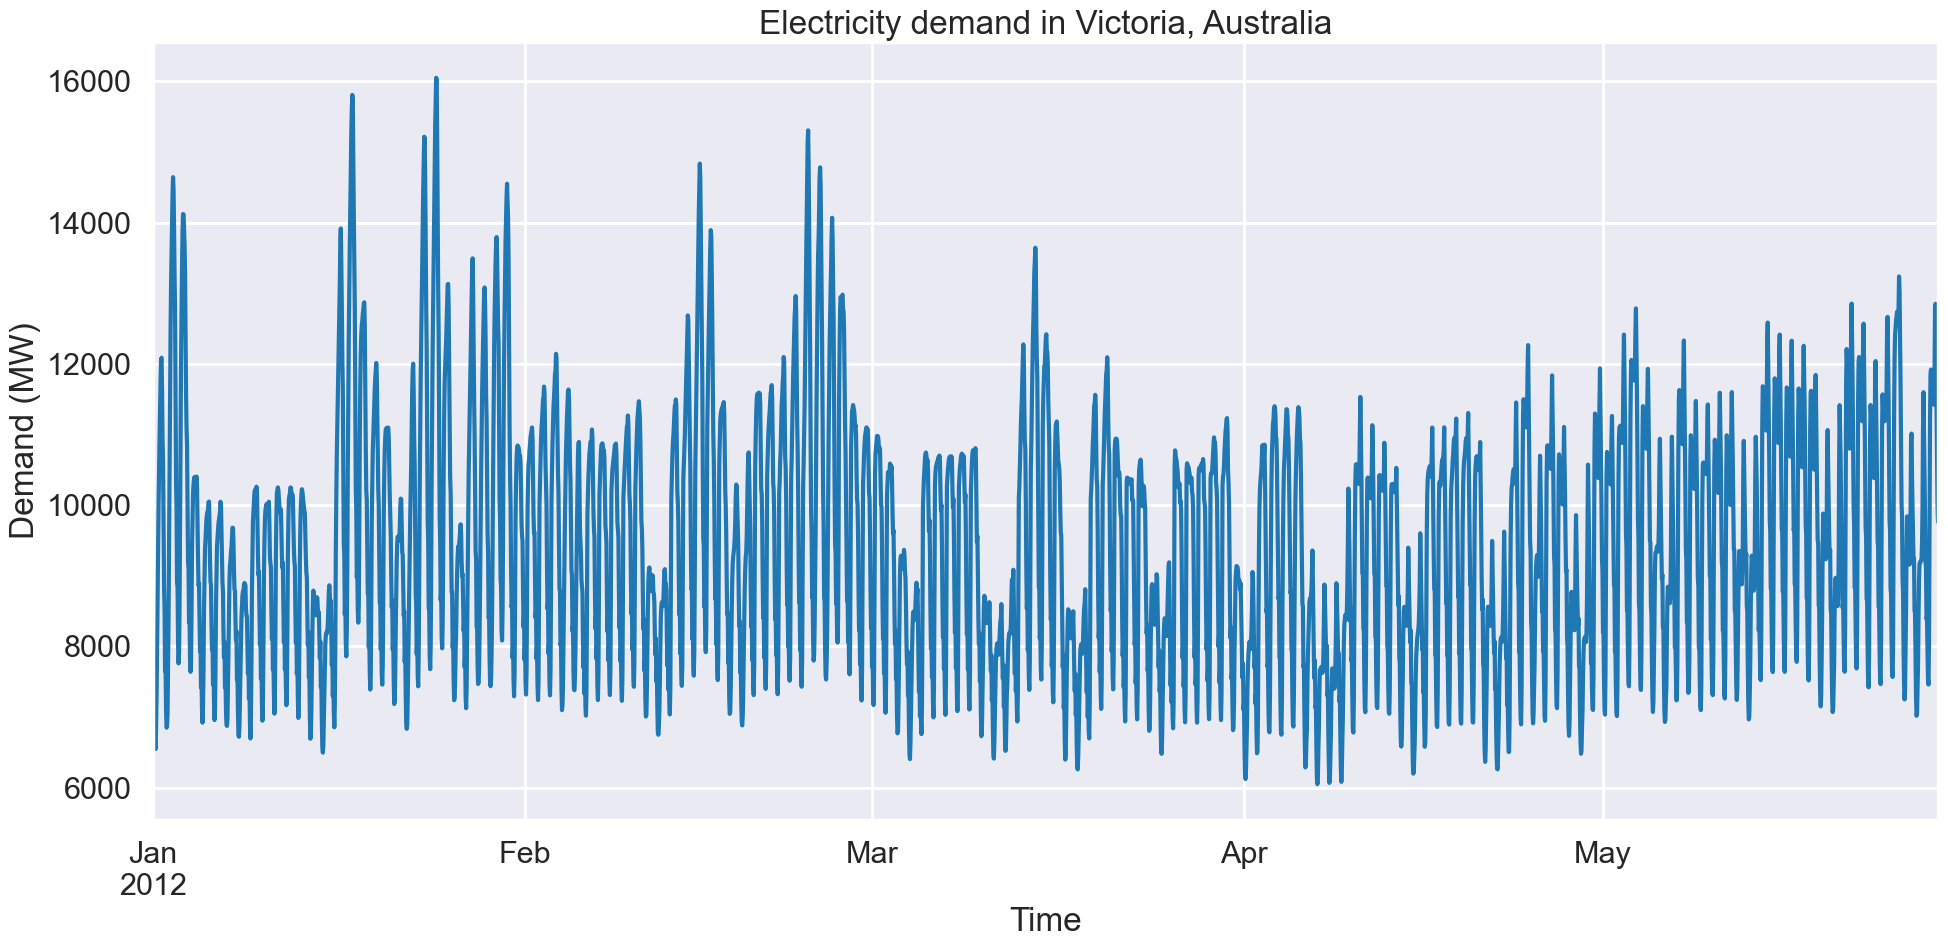

In [20]:
# Compute date time variables used later in plotting
timeseries["week"] = timeseries.index.isocalendar().week
timeseries["day_of_month"] = timeseries.index.day
timeseries["month"] = timeseries.index.month


# Plot the time series
ax = timeseries.plot(y="demand", figsize=[20, 10], legend=False)
ax.set_ylabel("Demand (MW)")
ax.set_xlabel("Time")
ax.set_title("Electricity demand in Victoria, Australia")
plt.tight_layout()

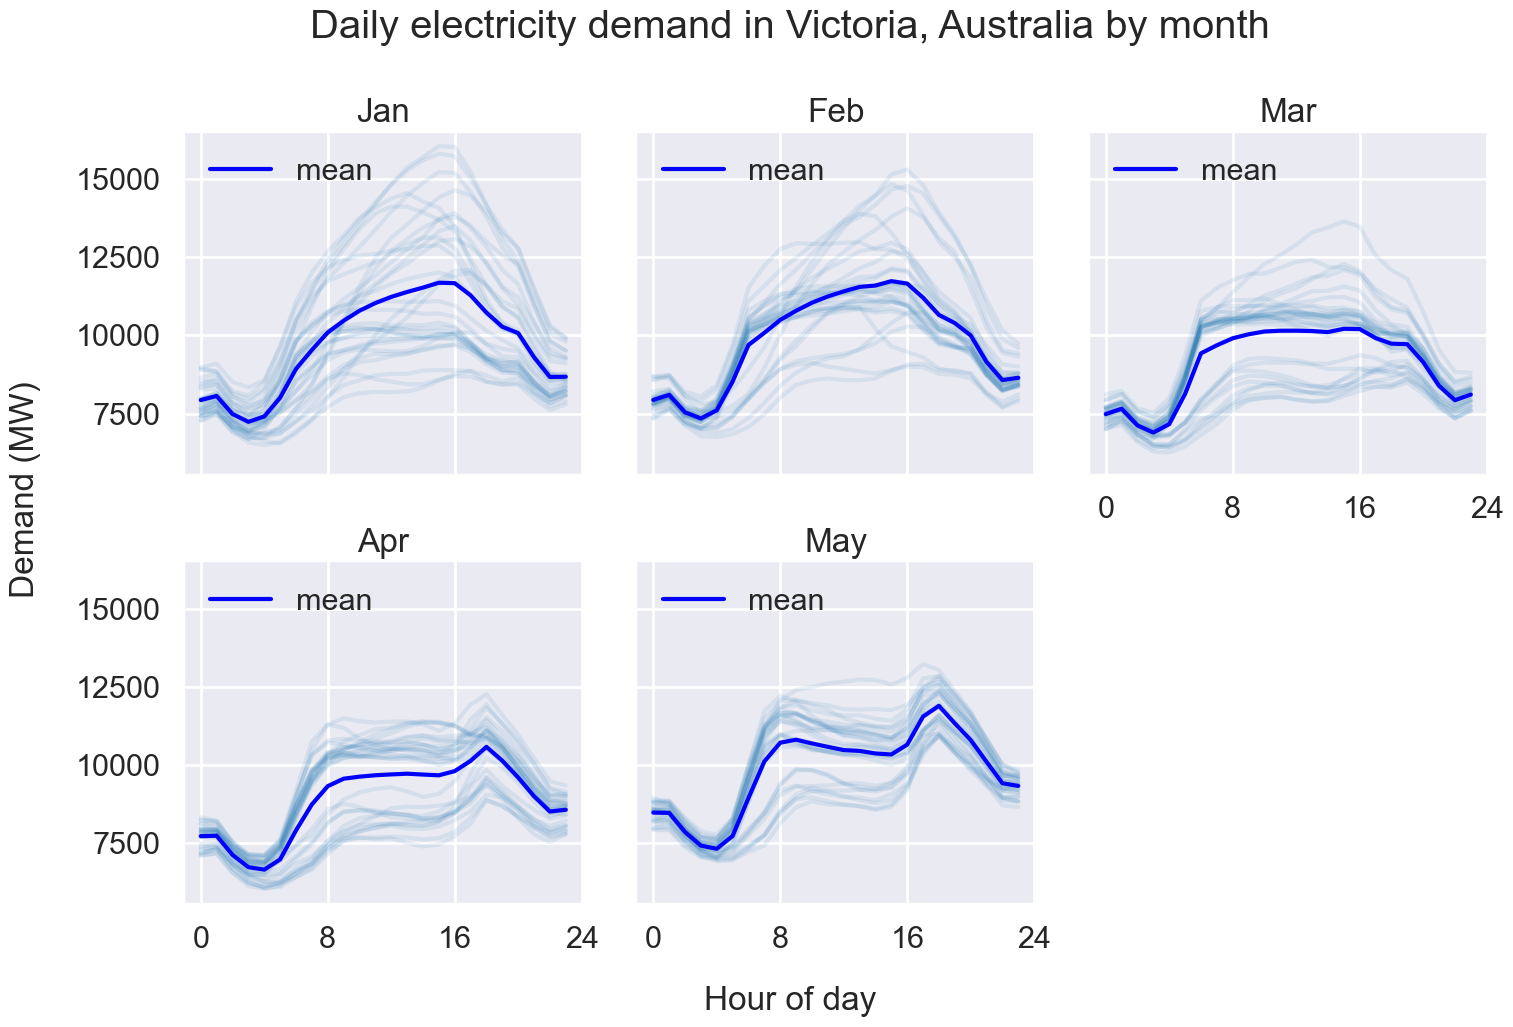

In [21]:
# We expect there to be a daily seasonality associated with electricity demand. Let’s confirm this by plotting the hourly demand for each day and segregating it by month.
# Plot the electricity demand for each day in each month
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[15, 10], sharey=True)
ax = ax.flatten()
sns_blue = sns.color_palette(as_cmap=True)[0] # Get seaborn blue color
MONTHS = ["Jan", "Feb", "Mar", "Apr", "May"]
for ix, month in enumerate(MONTHS): # Iterate over each month

    # Plot individual time series for each day 
    daily_ts = []
    for _, ts in ( # Loop over the demand for each day in a given month
        timeseries[["demand", "day_of_month", "month"]]
        .query(f"month == {ix+1}") # Filter timeseries to a single month
        .groupby("day_of_month") 
    ):
        ts = ts.reset_index()
        daily_ts.append(ts["demand"]) # Store the daily demand time series
        ts["demand"].plot( # Plot the time series for a single day
            alpha=0.1, ax=ax[ix], color=sns_blue, label="_no_legend_"
            )
        ax[ix].set_xticks(np.arange(0, len(ts) + 1, 8))
        ax[ix].set_title(month)

    # Plot average electricity demand at each hour of the day
    pd.concat(daily_ts, axis=1).mean(axis=1).plot(
        ax=ax[ix], color="blue", label="mean", legend=True
    ) # Compute average of the daily time series and plot it
    ax[ix].legend(loc="upper left", frameon=False)

    if month in ("Jan", "Feb"):
        ax[ix].tick_params(
            axis="x", which="both", bottom=False, top=False, labelbottom=False
        )

fig.text(0.5, -0.02, "Hour of day", ha="center")
fig.text(-0.02, 0.5, "Demand (MW)", va="center", rotation="vertical")
fig.suptitle("Daily electricity demand in Victoria, Australia by month")
fig.delaxes(ax[-1])
fig.tight_layout()

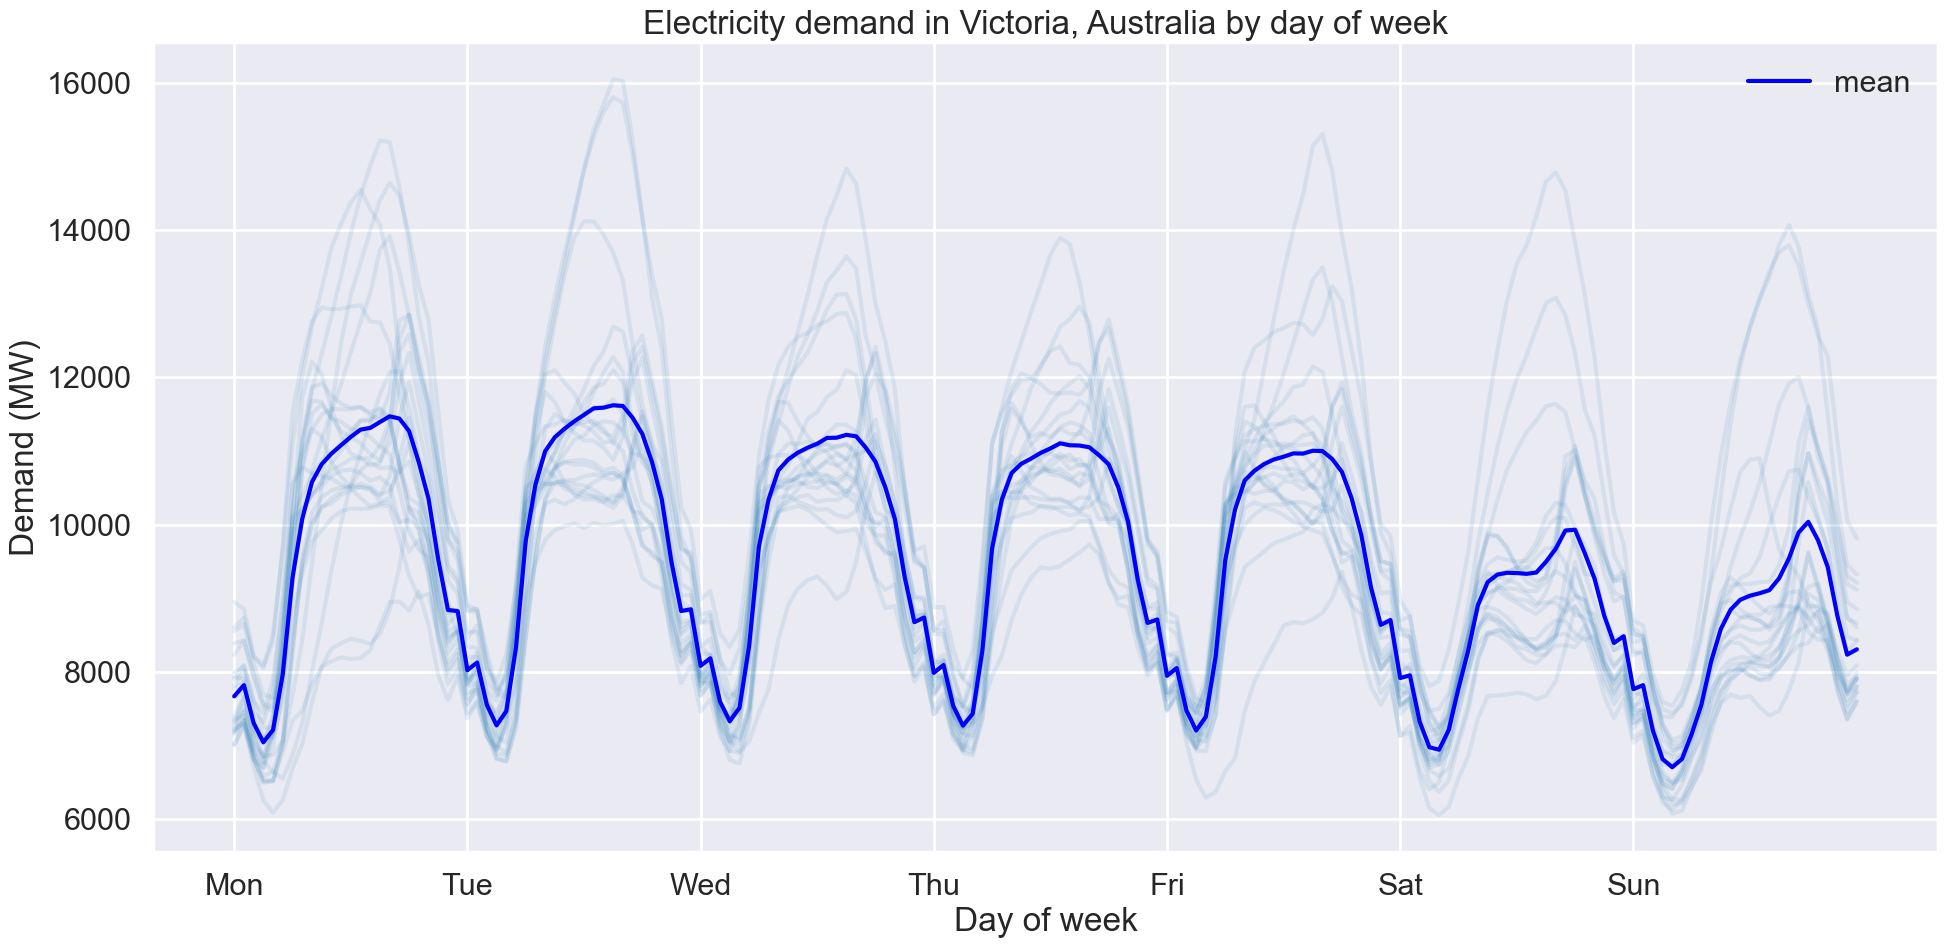

In [22]:
# We see that there is daily seasonality. We can also see the daily seasonality change in time. In the summer months (e.g., January) there is a daily peak around 4 PM whereas in the winter months (e.g., May) there are now two peaks, one around 8 AM and another around 6 PM. Now let’s plot the data to look at weekly seasonality.

fig, ax = plt.subplots(figsize=[20, 10])
weekly_ts = []
sns_blue = sns.color_palette(as_cmap=True)
DAYS = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Iterate over each week
for week, ts in timeseries.groupby("week"):
    ts = ts.reset_index()
    weekly_ts.append(ts["demand"]) # Store the weekly time series 
    ts["demand"].plot( # Plot the weekly time series
        alpha=0.1, ax=ax, label="_no_legend_", color=sns_blue)
    plt.xticks(ticks=np.arange(0, 167, 24), labels=DAYS)

pd.concat(weekly_ts, axis=1).mean(axis=1).plot( # Compute average over all weeks and plot average
    ax=ax, color="blue", label="mean", legend=True
)

ax.set_ylabel("Demand (MW)")
ax.set_title("Electricity demand in Victoria, Australia by day of week")
ax.set_xlabel("Day of week")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

####  Apply MSTL to the electricity demand dataset
* The key inputs into MSTL are:
* periods - The period of each seasonal component (e.g., for hourly data with daily and weekly
seasonality we would have: periods=(24, 24*7).
* windows - The lengths of each seasonal smoother with respect to each period. If these are large then the seasonal component will show less variability over time. Must be odd. If None a set of default values determined by experiments conducted in [1] are selected.
* lmbda - The lambda parameter for a Box-Cox transformation prior to decomposition. If None then no transformation is done. If "auto" then an appropriate value for lambda is automatically selected from the data.
* iterate - Number of iterations to use to refine the seasonal component.
* stl_kwargs - All the other parameters which can be passed to STL (e.g., robust, seasonal_deg, etc.). See STL docs.

<br>
<br>
* Note: there are some key differences in this implementation to [1]. Missing data must be handled outside of the MSTL class. The algorithm proposed in the paper handles a case when there is no seasonality. This implementation assumes that there is at least one seasonal component.

In [24]:
mstl = MSTL(timeseries["demand"], periods=(24, 24 * 7), stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()

In [25]:
res.trend.head()

date_time
2012-01-01 00:00:00    10375.731736
2012-01-01 01:00:00    10365.259614
2012-01-01 02:00:00    10354.790969
2012-01-01 03:00:00    10344.325971
2012-01-01 04:00:00    10333.864811
Name: trend, dtype: float64

In [26]:
res.seasonal.head()

,seasonal_24,seasonal_168
date_time,,
2012-01-01 00:00:00,-1694.799788,-165.282860
2012-01-01 01:00:00,-1602.267142,-231.770996
2012-01-01 02:00:00,-2205.330138,-260.793169
2012-01-01 03:00:00,-2455.880584,-387.594018
2012-01-01 04:00:00,-2372.200885,-656.522701


In [27]:
res.resid.head()

date_time
2012-01-01 00:00:00   -589.119712
2012-01-01 01:00:00   -629.394486
2012-01-01 02:00:00   -632.946312
2012-01-01 03:00:00   -708.348017
2012-01-01 04:00:00   -669.156765
Name: resid, dtype: float64

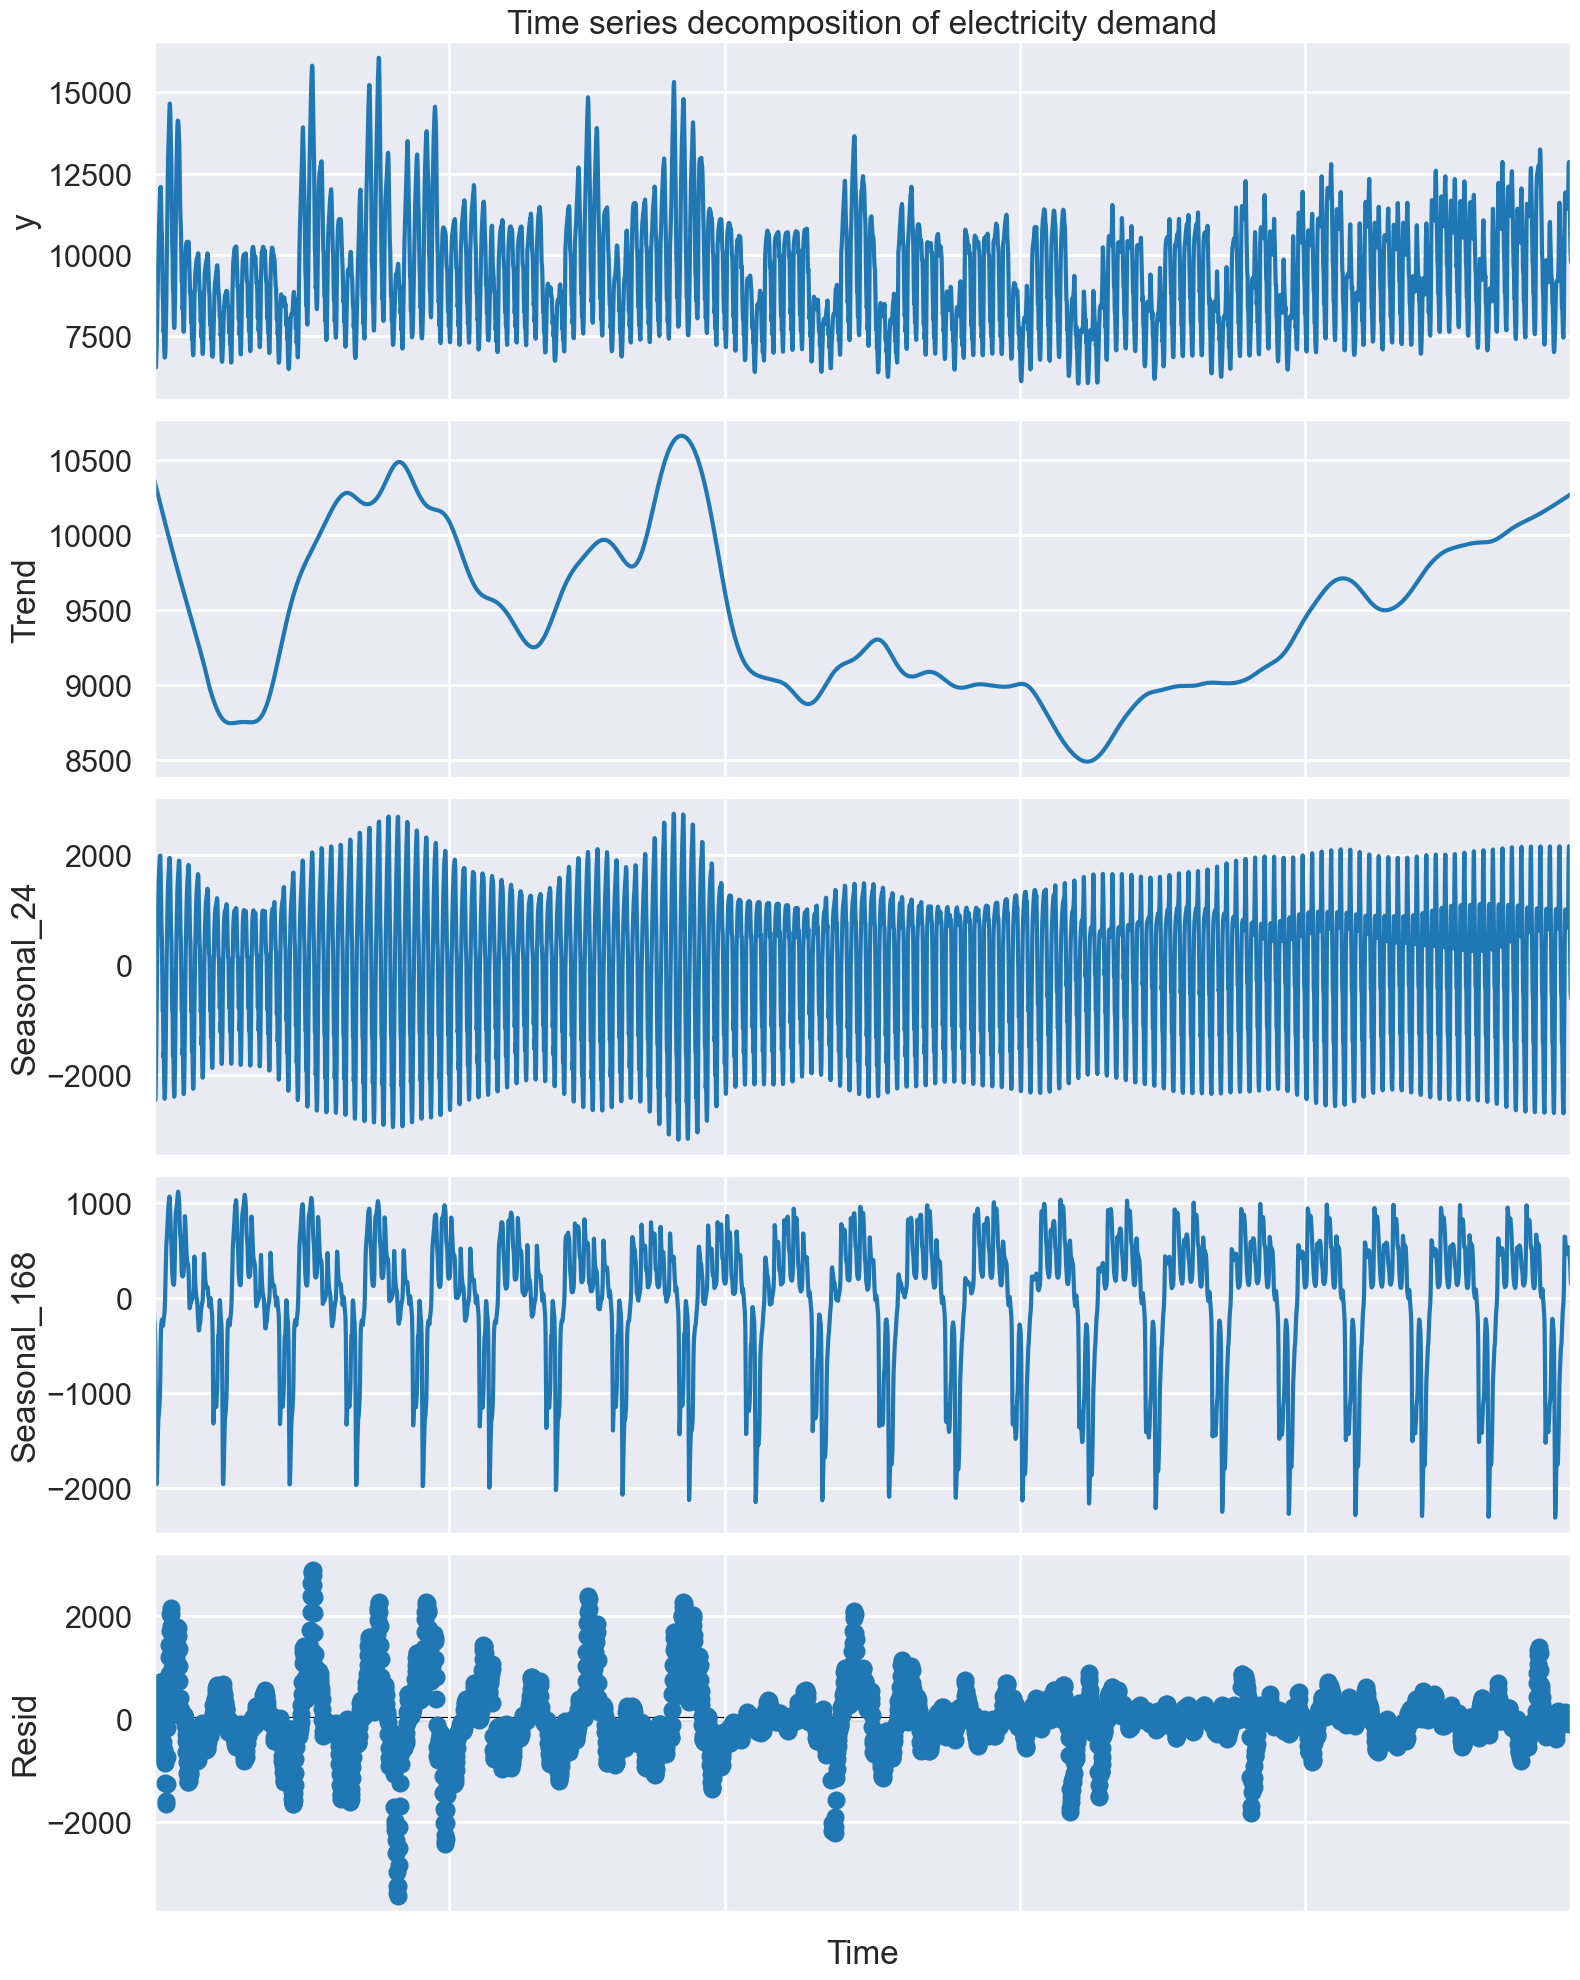

In [29]:
#####################   Plot the MSTL decomposition ##################

# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

# Make plot pretty
axs = fig.get_axes()

ax_last = axs[-1]
ax_last.xaxis.set_ticks(pd.date_range(start="2012-01-01", freq="MS", periods=5))
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax.xaxis.set_ticks(pd.date_range(start="2012-01-01", freq="MS", periods=5))
    ax.set_xticklabels([])
axs[0].set_ylabel("y")
axs[0].set_title("Time series decomposition of electricity demand")
ax_last.set_xlabel("Time")

plt.tight_layout()